In [1]:
import pandas as pd
import numpy as np

Load DF with Nans and model Metrics 

In [2]:
df_with_Nans=pd.read_parquet("/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/nadire/dffinal_for_comparison.parquet")

In [3]:
print(df_with_Nans)

                      time  bo_aux_blower_running  bo_gov_mode_rpm  \
0      2024-04-20 11:01:00                    0.0              1.0   
1      2024-04-20 11:02:00                    0.0              1.0   
2      2024-04-20 11:03:00                    1.0              1.0   
3      2024-04-20 11:04:00                    1.0              1.0   
4      2024-04-20 11:05:00                    1.0              1.0   
...                    ...                    ...              ...   
102497 2024-08-30 13:45:00                    1.0              1.0   
102498 2024-08-30 13:46:00                    1.0              1.0   
102499 2024-08-30 13:47:00                    1.0              1.0   
102500 2024-08-30 13:48:00                    1.0              1.0   
102501 2024-08-30 13:49:00                    1.0              1.0   

        in_engine_running_mode  in_reference_mode  in_stable  pd_air_ic  \
0                          1.0                1.0        0.0      120.0   
1        

In [4]:
#Imputed Data 
VAE_Imputed=pd.read_parquet("/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/nadire/DFImputedwizVAE.parquet")

Visualization: Original and Imputed 

In [5]:
def compare_statistics(original, imputed, columns):
    for col in columns:
        orig_col = original[col].dropna()
        imputed_col = imputed[col]
        print(f"Statistics for {col}:")
        print(f"Original: mean = {orig_col.mean()}, std = {orig_col.std()}")
        print(f"Imputed: mean = {imputed_col.mean()}, std = {imputed_col.std()}")
        print()

# Apply comparison and plotting
compare_statistics(df_with_Nans, VAE_Imputed, VAE_Imputed.columns)

Statistics for bo_aux_blower_running:
Original: mean = 0.24532582335914888, std = 0.43028231917274556
Imputed: mean = 0.24532581865787506, std = 0.430282324552536

Statistics for bo_gov_mode_rpm:
Original: mean = 0.7037960572635532, std = 0.45658428092012937
Imputed: mean = 0.7037960290908813, std = 0.45658427476882935

Statistics for in_engine_running_mode:
Original: mean = 1.2907474771180474, std = 0.46538245398810296
Imputed: mean = 1.2907475233078003, std = 0.46538245677948

Statistics for in_reference_mode:
Original: mean = 2.1410075882030823, std = 1.8061461557447227
Imputed: mean = 2.141007661819458, std = 1.8061461448669434

Statistics for in_stable:
Original: mean = 0.7400160369240397, std = 0.4386276135486575
Imputed: mean = 0.7400160431861877, std = 0.43862760066986084

Statistics for pd_air_ic:
Original: mean = 97.7329799925681, std = 75.25351076634121
Imputed: mean = 97.73107147216797, std = 75.25401306152344

Statistics for pr_air_scav_ecs:
Original: mean = 96854.40394722

/tmp/ipykernel_12797/2150242760.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(orig_col, fill=True, label='Original', ax=axes[i])
/tmp/ipykernel_12797/2150242760.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(imputed_col, fill=True, label='Imputed', ax=axes[i])
/tmp/ipykernel_12797/2150242760.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


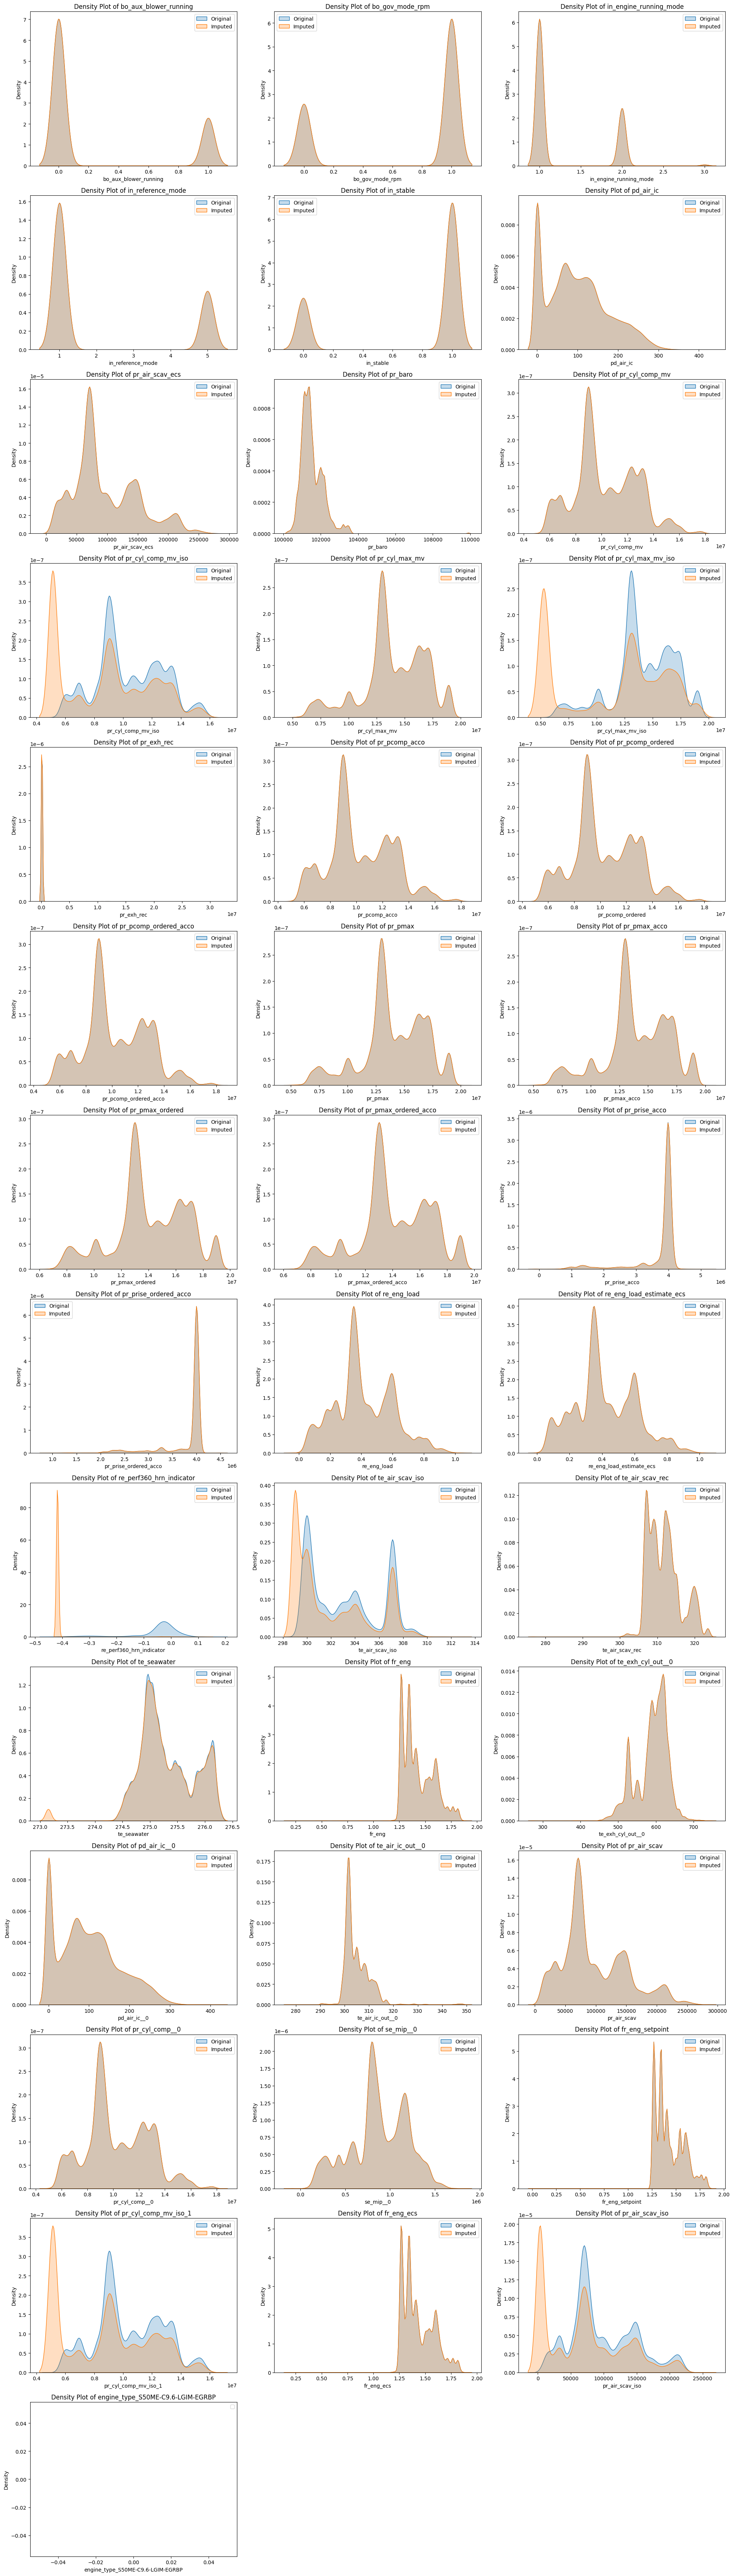

In [6]:
#Density
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density(original, imputed, columns, plots_per_row=3):
    num_columns = len(columns)
    num_rows = (num_columns + plots_per_row - 1) // plots_per_row  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, 5 * num_rows))  # Adjust figure size
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, col in enumerate(columns):
        orig_col = original[col].dropna()
        imputed_col = imputed[col]

        sns.kdeplot(orig_col, fill=True, label='Original', ax=axes[i])
        sns.kdeplot(imputed_col, fill=True, label='Imputed', ax=axes[i])
        axes[i].set_title(f'Density Plot of {col}')
        axes[i].legend()

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_density(df_with_Nans, VAE_Imputed, VAE_Imputed.columns)

/tmp/ipykernel_12797/3488879501.py:21: RuntimeWarning: invalid value encountered in scalar divide
  'std_diff_percentage': ((imp_std - orig_std) / orig_std) * 100


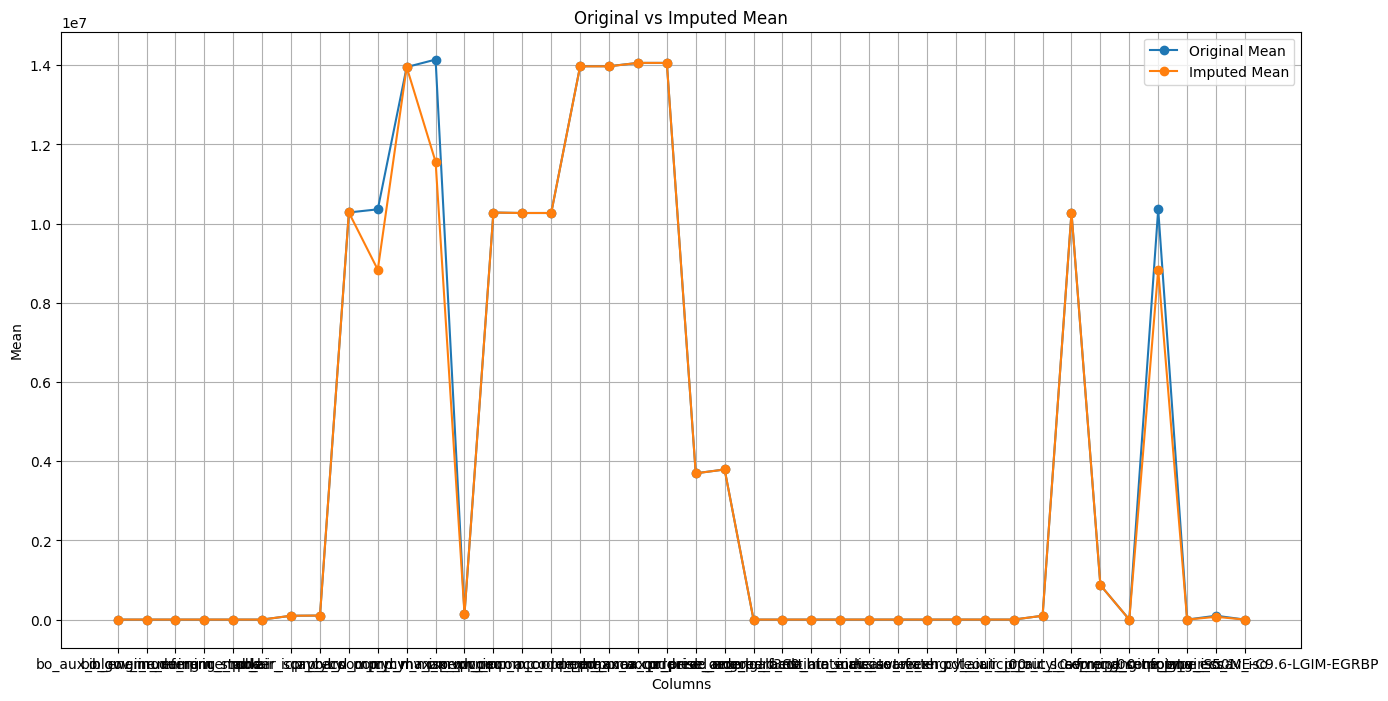

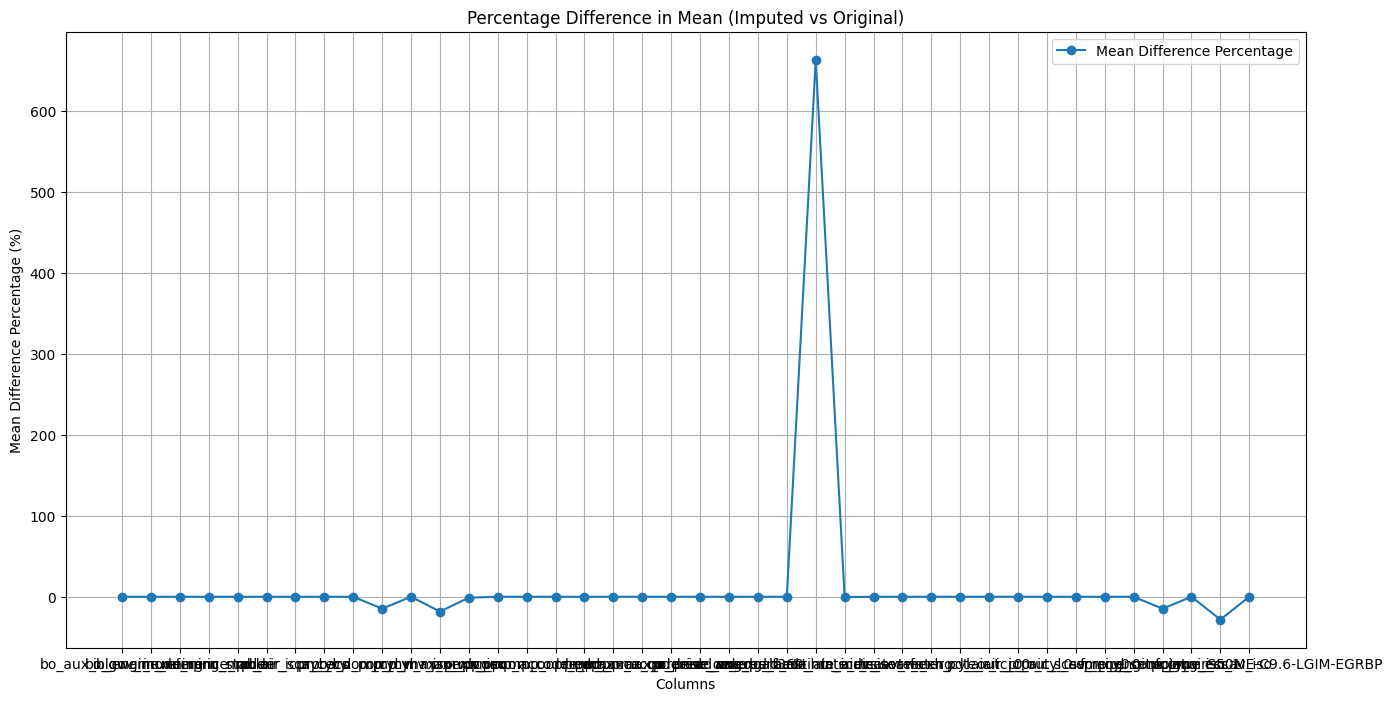

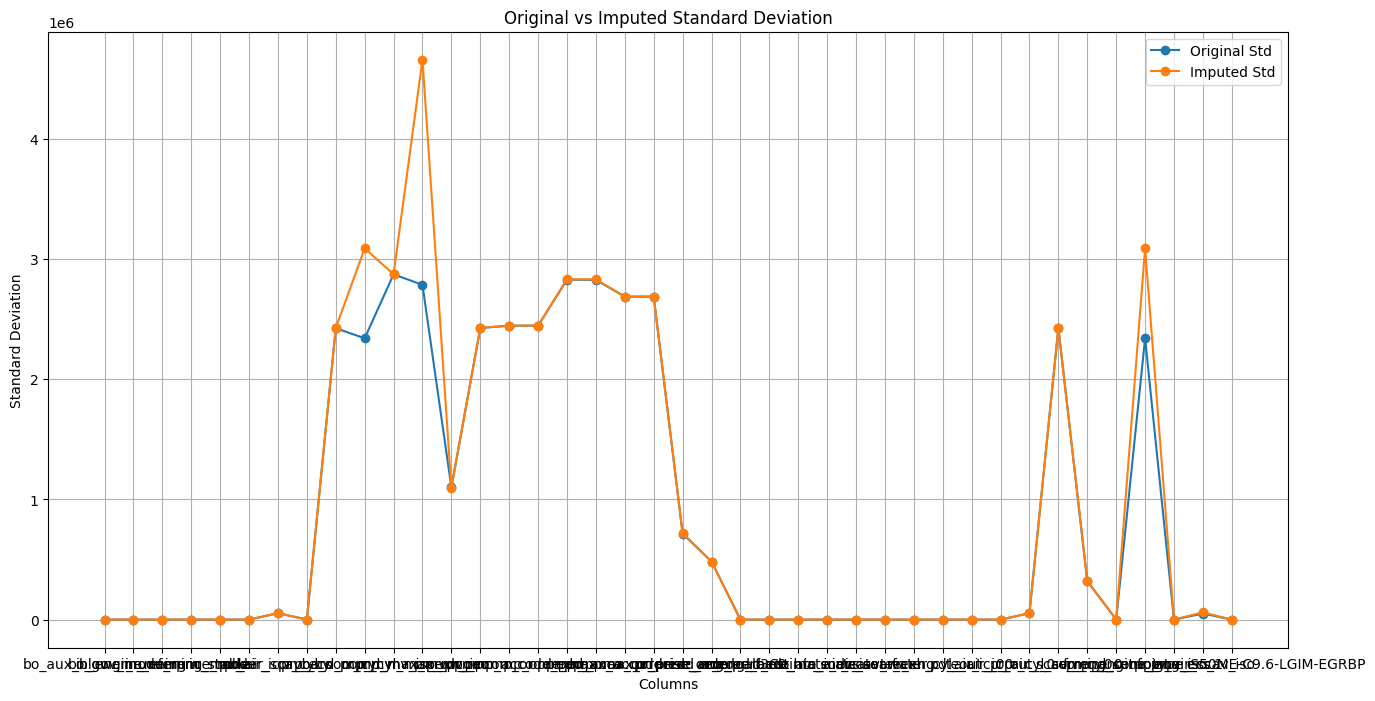

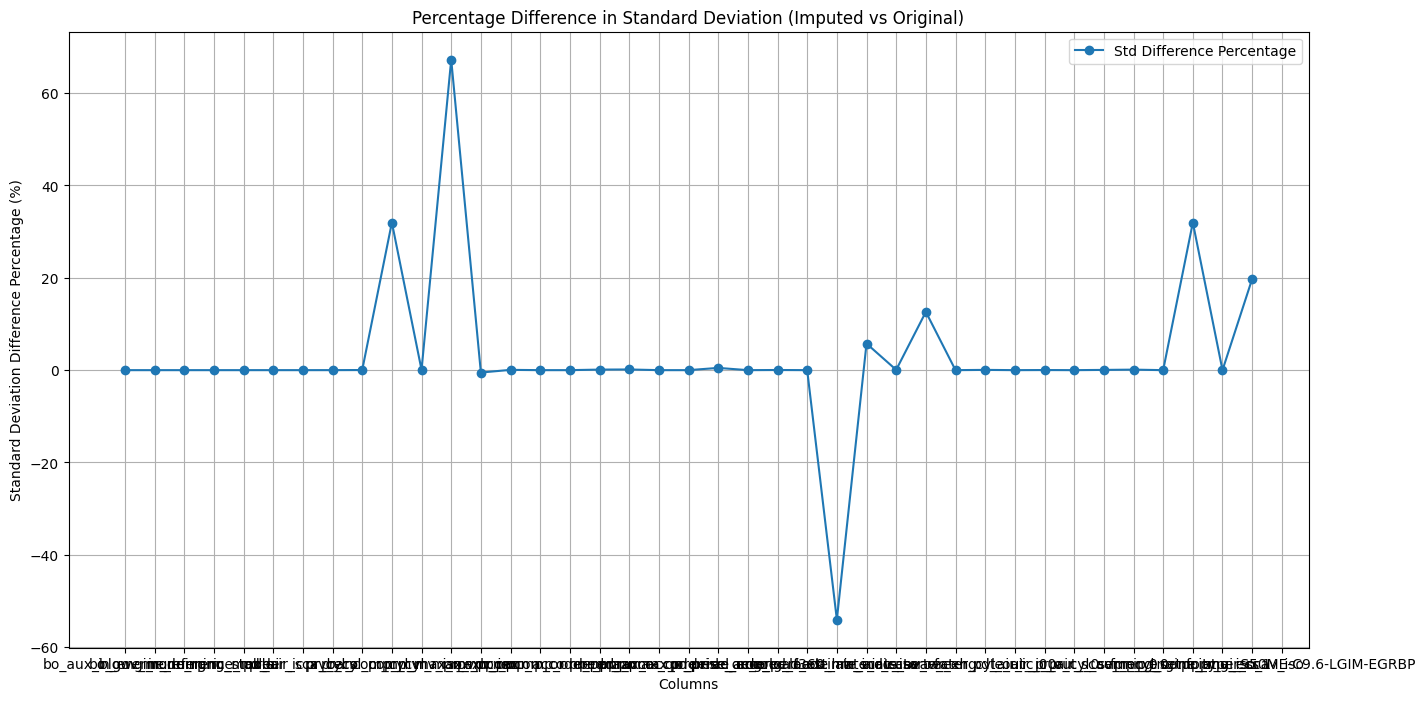

In [7]:
# Compare summary statistics and visualize percentages
def compare_statistics_line_plot(original, imputed, columns):
    stats = []

    for col in columns:
        orig_col = original[col].dropna()
        imputed_col = imputed[col]
        
        orig_mean = orig_col.mean()
        orig_std = orig_col.std()
        imp_mean = imputed_col.mean()
        imp_std = imputed_col.std()
        
        stats.append({
            'column': col,
            'original_mean': orig_mean,
            'imputed_mean': imp_mean,
            'mean_diff_percentage': ((imp_mean - orig_mean) / orig_mean) * 100,
            'original_std': orig_std,
            'imputed_std': imp_std,
            'std_diff_percentage': ((imp_std - orig_std) / orig_std) * 100
        })
        
    # Convert stats to DataFrame for easier plotting
    stats_df = pd.DataFrame(stats)
    
    # Plot mean differences
    plt.figure(figsize=(16, 8))
    plt.plot(stats_df['column'], stats_df['original_mean'], marker='o', label='Original Mean')
    plt.plot(stats_df['column'], stats_df['imputed_mean'], marker='o', label='Imputed Mean')
    plt.xlabel('Columns')
    plt.ylabel('Mean')
    plt.title('Original vs Imputed Mean')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot mean difference percentages
    plt.figure(figsize=(16, 8))
    plt.plot(stats_df['column'], stats_df['mean_diff_percentage'], marker='o', label='Mean Difference Percentage')
    plt.xlabel('Columns')
    plt.ylabel('Mean Difference Percentage (%)')
    plt.title('Percentage Difference in Mean (Imputed vs Original)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot standard deviation differences
    plt.figure(figsize=(16, 8))
    plt.plot(stats_df['column'], stats_df['original_std'], marker='o', label='Original Std')
    plt.plot(stats_df['column'], stats_df['imputed_std'], marker='o', label='Imputed Std')
    plt.xlabel('Columns')
    plt.ylabel('Standard Deviation')
    plt.title('Original vs Imputed Standard Deviation')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot standard deviation difference percentages
    plt.figure(figsize=(16, 8))
    plt.plot(stats_df['column'], stats_df['std_diff_percentage'], marker='o', label='Std Difference Percentage')
    plt.xlabel('Columns')
    plt.ylabel('Standard Deviation Difference Percentage (%)')
    plt.title('Percentage Difference in Standard Deviation (Imputed vs Original)')
    plt.legend()
    plt.grid(True)
    plt.show()


compare_statistics_line_plot(df_with_Nans, VAE_Imputed, VAE_Imputed.columns)

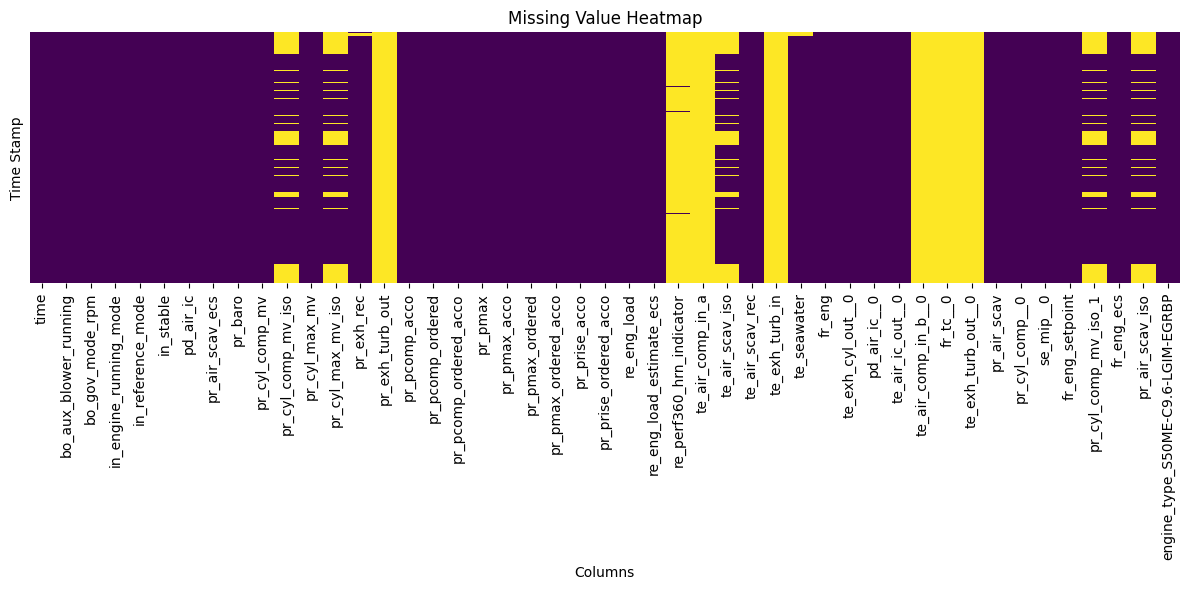

In [99]:
#missing value heatmap
missing_matrix=df_with_Nans.isnull().astype(int)

plt.figure(figsize=(12, 6))
sns.heatmap(
    missing_matrix,
    cmap='viridis',         # or 'YlGnBu', 'magma', etc.
    cbar=False,            
    yticklabels=False     
)

plt.title("Missing Value Heatmap")
plt.xlabel("Columns")
plt.ylabel("Time Stamp")
plt.tight_layout()
plt.show()

In [100]:
missing_matrix=missing_matrix.loc[:,missing_matrix.sum().sort_values(ascending=False).index]

In [101]:
missing_matrix.iloc[:1000,:10]

,pr_exh_turb_out,te_exh_turb_in,te_air_comp_in_b__0,fr_tc__0,te_exh_turb_out__0,te_air_comp_in_a,re_perf360_hrn_indicator,te_air_scav_iso,pr_air_scav_iso,pr_cyl_comp_mv_iso
0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,1,1,1,1,1,1,1
996,1,1,1,1,1,1,1,1,1,1
997,1,1,1,1,1,1,1,1,1,1
998,1,1,1,1,1,1,1,1,1,1


In [15]:
#Check Missing Status per column 
df=df_with_Nans
for col in df.columns:
    print(f"Column {col} has {df[col].isna().sum()} NaN values")
    missing_rate=df[col].isna().sum()/len(df[col])
    print(f"Column {col} has {missing_rate} Missing_rate")

Column time has 0 NaN values
Column time has 0.0 Missing_rate
Column bo_aux_blower_running has 0 NaN values
Column bo_aux_blower_running has 0.0 Missing_rate
Column bo_gov_mode_rpm has 0 NaN values
Column bo_gov_mode_rpm has 0.0 Missing_rate
Column in_engine_running_mode has 0 NaN values
Column in_engine_running_mode has 0.0 Missing_rate
Column in_reference_mode has 0 NaN values
Column in_reference_mode has 0.0 Missing_rate
Column in_stable has 0 NaN values
Column in_stable has 0.0 Missing_rate
Column pd_air_ic has 2 NaN values
Column pd_air_ic has 1.955722443870766e-05 Missing_rate
Column pr_air_scav_ecs has 0 NaN values
Column pr_air_scav_ecs has 0.0 Missing_rate
Column pr_baro has 2 NaN values
Column pr_baro has 1.955722443870766e-05 Missing_rate
Column pr_cyl_comp_mv has 13 NaN values
Column pr_cyl_comp_mv has 0.00012712195885159977 Missing_rate
Column pr_cyl_comp_mv_iso has 29794 NaN values
Column pr_cyl_comp_mv_iso has 0.29134397246342797 Missing_rate
Column pr_cyl_max_mv has 13 

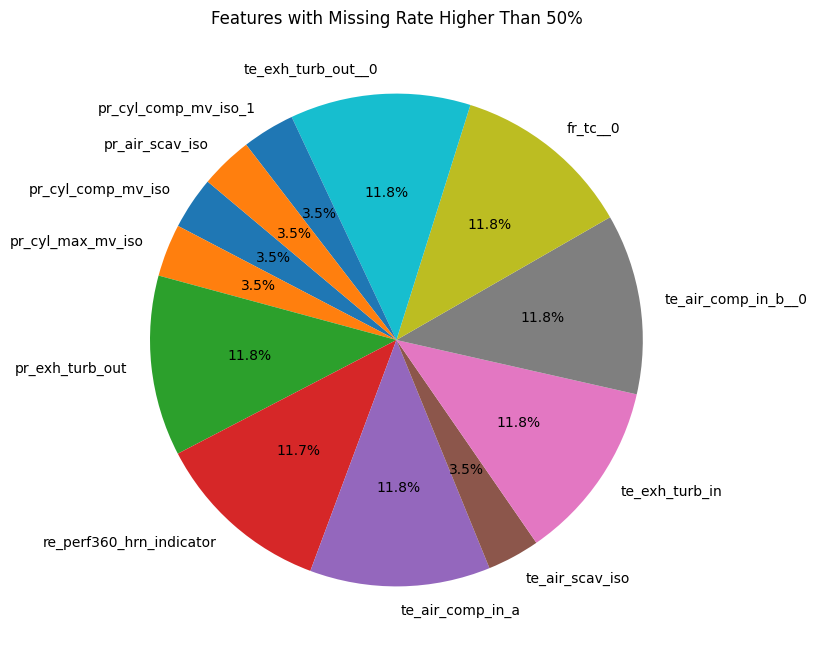

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert to DataFrame for easier manipulation
# Calculate missing rate per feature
missing_rate = df_with_Nans.isna().mean()

# Identify features with missing rate higher than 50%
high_missing_features = missing_rate[missing_rate > 0.2]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(high_missing_features, labels=high_missing_features.index, autopct='%1.1f%%', startangle=140)
plt.title('Features with Missing Rate Higher Than 50%')
plt.show()



In [34]:
type(missing_rate)

pandas.core.series.Series

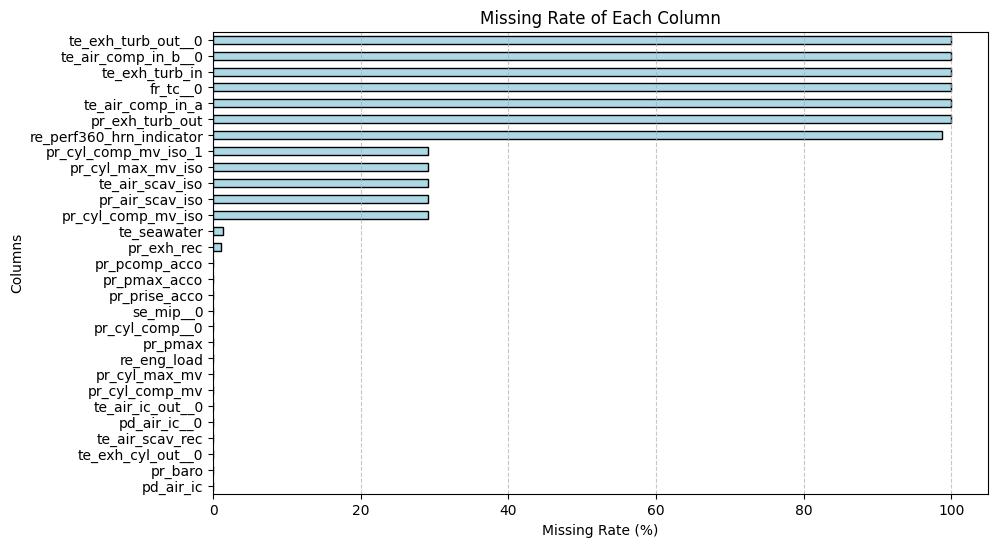

In [39]:

# Horizontal Bar Chart

# Calculate missing rate
missing_rate = df_with_Nans.isnull().mean() * 100
# Plot horizontal bar chart with lighter colors
missing_rate = missing_rate[missing_rate > 0]

# Sort columns by missing rate in descending order
missing_rate = missing_rate.sort_values(ascending=True)

# Plot horizontal bar chart with lighter colors
plt.figure(figsize=(10, 6))
missing_rate.plot(kind='barh', color='lightblue', edgecolor='black')
plt.xlabel('Missing Rate (%)')
plt.ylabel('Columns')
plt.title('Missing Rate of Each Column')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



In [62]:
common_features

{'bo_aux_blower_running',
 'fr_eng',
 'fr_eng_ecs',
 'fr_eng_setpoint',
 'pd_air_ic__0',
 'pr_air_scav',
 'pr_air_scav_ecs',
 'pr_air_scav_iso',
 'pr_baro',
 'pr_cyl_comp__0',
 'pr_cyl_comp_mv_iso',
 'pr_cyl_max_mv_iso',
 'pr_exh_rec',
 're_eng_load',
 'se_mip__0',
 'te_air_ic_out__0',
 'te_air_scav_rec',
 'te_exh_cyl_out__0',
 'te_seawater'}

In [63]:
VAE_Imputed.columns

Index(['bo_aux_blower_running', 'bo_gov_mode_rpm', 'in_engine_running_mode',
       'in_reference_mode', 'in_stable', 'pd_air_ic', 'pr_air_scav_ecs',
       'pr_baro', 'pr_cyl_comp_mv', 'pr_cyl_comp_mv_iso', 'pr_cyl_max_mv',
       'pr_cyl_max_mv_iso', 'pr_exh_rec', 'pr_pcomp_acco', 'pr_pcomp_ordered',
       'pr_pcomp_ordered_acco', 'pr_pmax', 'pr_pmax_acco', 'pr_pmax_ordered',
       'pr_pmax_ordered_acco', 'pr_prise_acco', 'pr_prise_ordered_acco',
       're_eng_load', 're_eng_load_estimate_ecs', 're_perf360_hrn_indicator',
       'te_air_scav_iso', 'te_air_scav_rec', 'te_seawater', 'fr_eng',
       'te_exh_cyl_out__0', 'pd_air_ic__0', 'te_air_ic_out__0', 'pr_air_scav',
       'pr_cyl_comp__0', 'se_mip__0', 'fr_eng_setpoint',
       'pr_cyl_comp_mv_iso_1', 'fr_eng_ecs', 'pr_air_scav_iso',
       'engine_type_S50ME-C9.6-LGIM-EGRBP'],
      dtype='object')

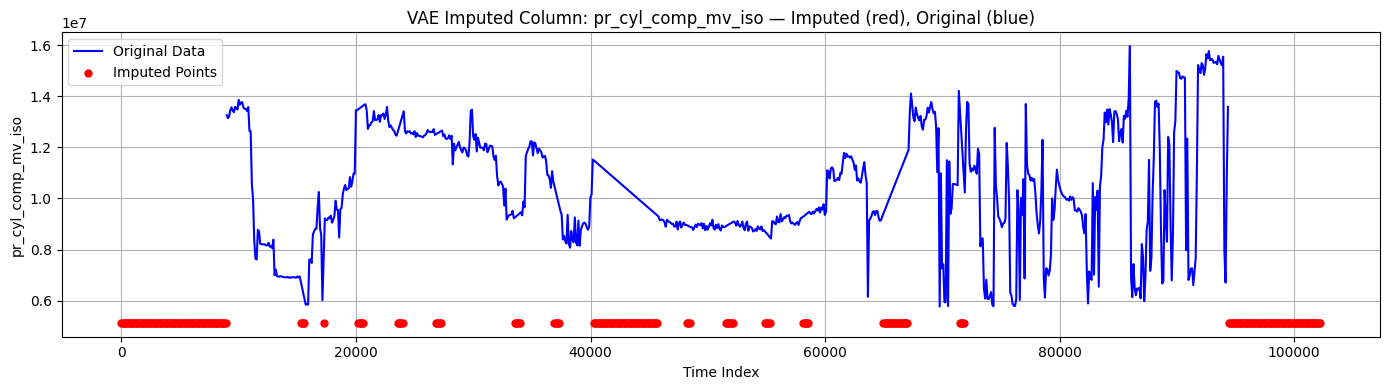

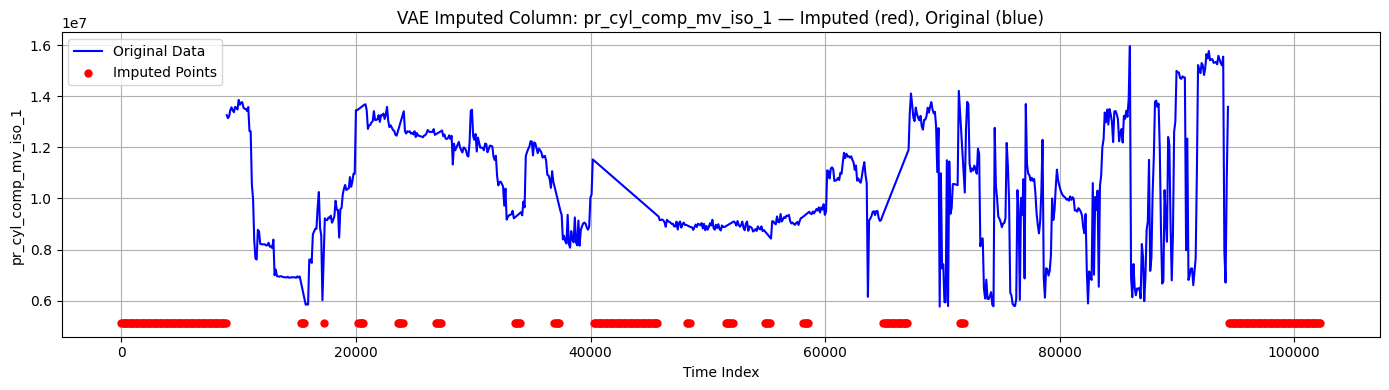

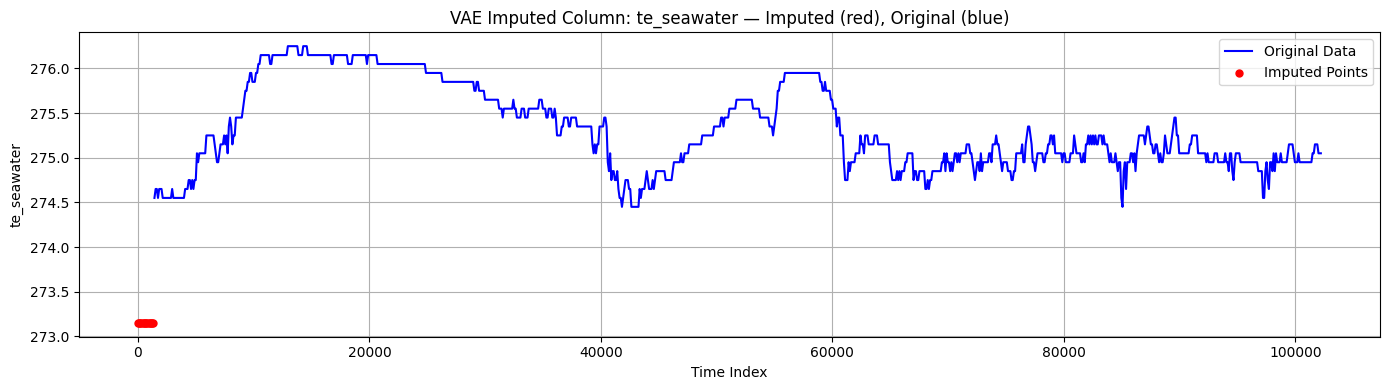

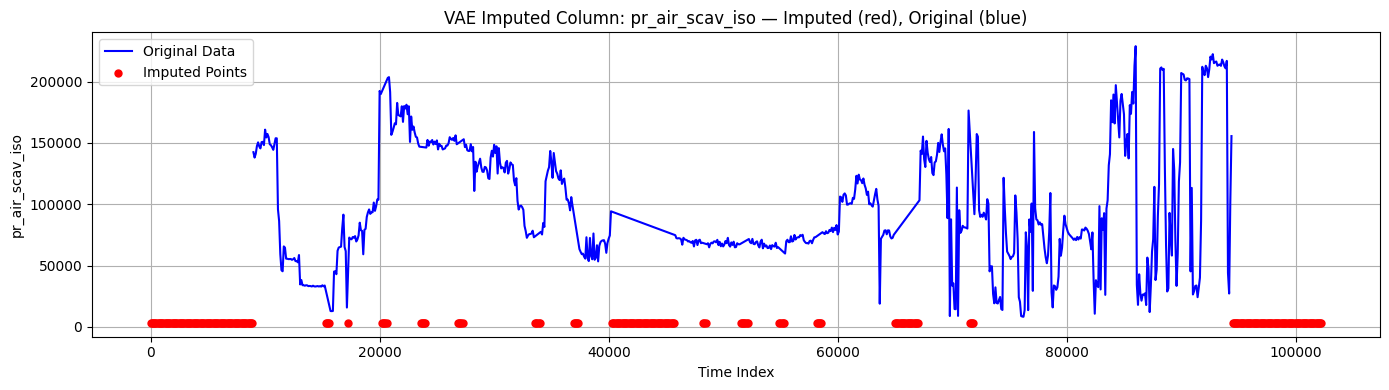

In [8]:
def plot_only_imputed_points(df_nan, df_imputed, columns_to_plot, max_points=1000):
    """
    Plot selected columns showing original values (blue) and imputed (red dots).

    Args:
        df_nan (pd.DataFrame): Original DataFrame with NaNs.
        df_imputed (pd.DataFrame): Imputed DataFrame.
        columns_to_plot (list): List of column names to visualize.
        max_points (int): Max number of points to display (for speed).
    """
    for col in columns_to_plot:
        imputed_col = df_imputed[col]
        original_col = df_nan[col]
        is_imputed = original_col.isna()
        is_original = ~is_imputed

        if len(imputed_col) > max_points:
            step = len(imputed_col) // max_points
            idx = np.arange(0, len(imputed_col), step)
        else:
            idx = np.arange(len(imputed_col))

        plt.figure(figsize=(14, 4))
        # Plot only original (non-NaN) values in blue
        plt.plot(
            idx[is_original.iloc[idx]],
            imputed_col.iloc[idx][is_original.iloc[idx]],
            color='blue',
            label='Original Data'
        )
        # Plot only imputed points in red
        plt.scatter(
            idx[is_imputed.iloc[idx]],
            imputed_col.iloc[idx][is_imputed.iloc[idx]],
            color='red',
            label='Imputed Points',
            s=25,
            zorder=5
        )

        plt.title(f"VAE Imputed Column: {col} — Imputed (red), Original (blue)")
        plt.xlabel("Time Index")
        plt.ylabel(col)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


plot_only_imputed_points(df_with_Nans,VAE_Imputed,columns_to_plot=["pr_cyl_comp_mv_iso","pr_cyl_comp_mv_iso_1","te_seawater", "pr_air_scav_iso"] )

Visualization (comparison of metrics)

GP-VAE Best Mean Average:
VAE Best Mean Average:
SAITS Best Mean Average: 

In [9]:
print(VAE_metrics)

NameError: name 'VAE_metrics' is not defined

In [27]:
VAE_metrics=pd.read_parquet("/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/nadire/VAE_metrics.parquet")
GP_VAE_metrics=pd.read_parquet("/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/nadire/GPVAE_metrics.parquet")
SAITS_metrics=pd.read_parquet("/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/nadire/SAITS_metrics.parquet")

In [28]:
common_features = set(VAE_metrics["feature"]) & set(GP_VAE_metrics["feature"]) & set(SAITS_metrics["feature"])
# Filter each df
VAE_filtered =VAE_metrics[VAE_metrics["feature"].isin(common_features)]
GP_VAE_filtered = GP_VAE_metrics[GP_VAE_metrics["feature"].isin(common_features)]
SAITS_filtered = SAITS_metrics[SAITS_metrics["feature"].isin(common_features)]

col_compare is from columns that have missing rate less than 1.0 and then appear in common feature list in all three models 

In [29]:
#Meaningful comparison might only lie in those with partial missingness
col_compare=["pr_cyl_max_mv_iso","pr_cyl_comp_mv_iso","te_seawater","pr_exh_rec"]

In [30]:
VAE_filtered=VAE_metrics[VAE_metrics["feature"].isin(col_compare)]
GP_VAE_filtered = GP_VAE_metrics[GP_VAE_metrics["feature"].isin(col_compare)]
SAITS_filtered = SAITS_metrics[SAITS_metrics["feature"].isin(col_compare)]

In [31]:
print(common_features)

{'pr_cyl_comp_mv_iso_1', 'te_seawater', 'pr_air_scav_ecs', 'pr_pmax_ordered_acco', 'pr_exh_rec', 'pr_prise_acco', 'fr_eng', 'pr_pcomp_ordered_acco', 'te_exh_cyl_out__0', 'pr_pmax_acco', 'pd_air_ic__0', 'bo_aux_blower_running', 'pr_baro', 'pd_air_ic', 'pr_prise_ordered_acco', 're_perf360_hrn_indicator', 'pr_air_scav_iso', 'te_air_scav_iso', 'pr_pmax_ordered', 'te_air_ic_out__0', 'fr_eng_setpoint', 'fr_eng_ecs', 'pr_pcomp_ordered', 're_eng_load_estimate_ecs', 'te_air_scav_rec', 'pr_pmax', 'pr_cyl_comp_mv_iso', 'pr_cyl_max_mv_iso', 'se_mip__0', 'pr_cyl_comp__0', 'pr_cyl_max_mv', 'in_engine_running_mode', 'pr_air_scav', 'in_stable', 're_eng_load', 'pr_pcomp_acco', 'in_reference_mode', 'pr_cyl_comp_mv', 'engine_type_S50ME-C9.6-LGIM-EGRBP', 'bo_gov_mode_rpm'}


In [32]:
VAE_filtered = VAE_filtered.copy()
VAE_filtered['model'] = 'VAE'

GP_VAE_filtered = GP_VAE_filtered.copy()
GP_VAE_filtered['model'] = 'GP-VAE'

SAITS_filtered = SAITS_filtered.copy()
SAITS_filtered['model'] = 'SAITS'

# Combine into one DataFrame
df_all = pd.concat([VAE_filtered, GP_VAE_filtered, SAITS_filtered], ignore_index=True)


In [33]:
GP_VAE_filtered

,feature,masked_mae,masked_mse,masked_rmse,percentage_mae_vs_std,model
9,pr_cyl_comp_mv_iso,3.173878e+06,1.246486e+13,3.530560e+06,95.308123,GP-VAE
11,pr_cyl_max_mv_iso,3.823303e+06,1.820817e+13,4.267103e+06,95.060194,GP-VAE
12,pr_exh_rec,8.089027e+06,6.543670e+13,8.089296e+06,12278.626967,GP-VAE
27,te_seawater,1.231640e-01,2.533407e-02,1.591668e-01,80.459633,GP-VAE


In [34]:
df_all.columns

Index(['feature', 'masked_mae', 'masked_mse', 'masked_rmse',
       'percentage_mae_vs_std', 'model'],
      dtype='object')

In [35]:
# Reshape for seaborn
df_long = df_all.melt(
    id_vars=['feature', 'model'],
    value_vars=['masked_mae', 'masked_mse', 'masked_rmse', 'percentage_mae_vs_std'],
    var_name='Metric',
    value_name='Value'
)


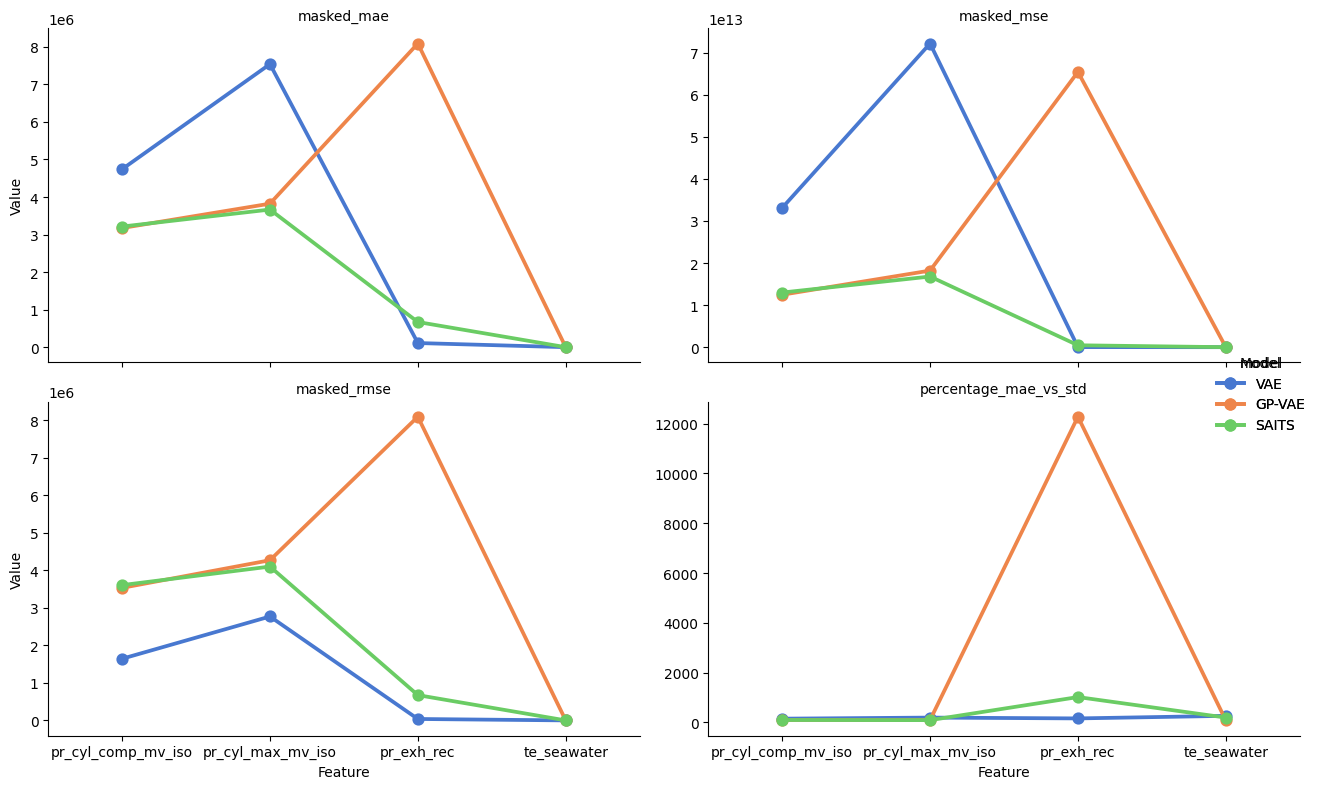

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Faceted bar plot: one subplot per metric
g = sns.catplot(
    data=df_long,
    kind='point',
    x='feature', y='Value', hue='model',
    col='Metric', col_wrap=2,
    height=4, aspect=1.4, sharey=False,
    palette='muted', 
)

g.set_titles("{col_name}")
g.set_axis_labels("Feature", "Value")
g.add_legend(title="Model")
plt.tight_layout()
plt.show()



In [37]:
common_features

{'bo_aux_blower_running',
 'bo_gov_mode_rpm',
 'engine_type_S50ME-C9.6-LGIM-EGRBP',
 'fr_eng',
 'fr_eng_ecs',
 'fr_eng_setpoint',
 'in_engine_running_mode',
 'in_reference_mode',
 'in_stable',
 'pd_air_ic',
 'pd_air_ic__0',
 'pr_air_scav',
 'pr_air_scav_ecs',
 'pr_air_scav_iso',
 'pr_baro',
 'pr_cyl_comp__0',
 'pr_cyl_comp_mv',
 'pr_cyl_comp_mv_iso',
 'pr_cyl_comp_mv_iso_1',
 'pr_cyl_max_mv',
 'pr_cyl_max_mv_iso',
 'pr_exh_rec',
 'pr_pcomp_acco',
 'pr_pcomp_ordered',
 'pr_pcomp_ordered_acco',
 'pr_pmax',
 'pr_pmax_acco',
 'pr_pmax_ordered',
 'pr_pmax_ordered_acco',
 'pr_prise_acco',
 'pr_prise_ordered_acco',
 're_eng_load',
 're_eng_load_estimate_ecs',
 're_perf360_hrn_indicator',
 'se_mip__0',
 'te_air_ic_out__0',
 'te_air_scav_iso',
 'te_air_scav_rec',
 'te_exh_cyl_out__0',
 'te_seawater'}

In [52]:
saits_imputed=pd.read_parquet("/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/nadire/df_SAITSimputed.parquet")

In [53]:
# Now both original_sampled and imputed_df should have the same shape
print(df_with_Nans.shape, saits_imputed.shape)


(102264, 47) (5114, 46)


In [54]:
print(saits_imputed)

      bo_aux_blower_running  bo_gov_mode_rpm  in_engine_running_mode  \
0                  0.600000         1.000000                1.000000   
1                  1.000000         1.000000                1.000000   
2                  1.000000         1.000000                1.000000   
3                  1.000000         1.000000                1.000000   
4                  1.000000         1.000000                1.000000   
...                     ...              ...                     ...   
5109               1.000000         1.000000                2.000000   
5110               1.000000         1.000000                2.000000   
5111               1.000000         1.000000                1.800000   
5112               1.000000         1.000000                1.000000   
5113              -0.606494         1.002906               -0.604054   

      in_reference_mode  in_stable   pd_air_ic  pr_air_scav_ecs  \
0               1.00000   0.000000  105.000000     61278.074219   
1

In [55]:
saits_imputed.describe()

,bo_aux_blower_running,bo_gov_mode_rpm,in_engine_running_mode,in_reference_mode,in_stable,pd_air_ic,pr_air_scav_ecs,pr_baro,pr_cyl_comp_mv,pr_cyl_comp_mv_iso,...,fr_tc__0,te_exh_turb_out__0,pr_air_scav,pr_cyl_comp__0,se_mip__0,fr_eng_setpoint,pr_cyl_comp_mv_iso_1,fr_eng_ecs,pr_air_scav_iso,engine_type_S50ME-C9.6-LGIM-EGRBP
count,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.00,5.114000e+03,...,5114.000000,5114.000000,5114.000000,5114.00,5.114000e+03,5114.000000,5.114000e+03,5114.000000,5114.000000,5114.000000
mean,0.245130,0.703843,1.290388,2.140515,0.740058,97.715698,96839.257812,101500.632812,10277591.00,7.340447e+06,...,-0.018353,-0.143714,96839.250000,10274466.00,8.701861e+05,1.432106,7.340447e+06,1.431905,69025.468750,0.999686
std,0.416808,0.455939,0.458252,1.778260,0.334803,71.749825,52503.656250,1289.368408,2399718.25,5.085102e+06,...,0.001438,0.001168,52503.664062,2401919.00,3.155497e+05,0.146894,5.085102e+06,0.146597,60954.550781,0.022468
min,-0.606494,0.000000,-0.604054,-0.604410,0.000000,-0.388054,3690.109375,20479.324219,1201549.50,-5.647212e-02,...,-0.025978,-0.147201,3690.115723,1199992.00,4.275043e+04,0.629558,-5.074156e-02,0.560888,-0.275158,-0.606718
25%,0.000000,0.000000,1.000000,1.000000,0.550000,42.000000,64091.912109,101100.000000,8776086.25,-5.646103e-02,...,-0.020458,-0.144414,64091.912109,8776884.25,7.011141e+05,1.323292,-5.074065e-02,1.323652,-0.266530,1.000000
50%,0.000000,1.000000,1.000000,1.000000,0.900000,85.250000,78113.285156,101400.000000,9603440.00,8.950882e+06,...,-0.017510,-0.144414,78113.285156,9598051.00,8.522435e+05,1.394957,8.950882e+06,1.394551,67848.710938,1.000000
75%,0.400000,1.000000,2.000000,5.000000,1.000000,138.500000,135170.218750,101900.000000,12282633.75,1.148442e+07,...,-0.017411,-0.142137,135170.218750,12282155.00,1.131743e+06,1.541618,1.148442e+07,1.543128,110820.343750,1.000000
max,1.000000,1.002906,3.000000,5.000000,1.000000,283.500000,263488.343750,109900.000000,17837224.00,1.586449e+07,...,-0.017411,-0.139427,263488.343750,17844108.00,1.630984e+06,1.852975,1.586449e+07,1.853044,234021.421875,1.000000


In [57]:
saits=pd.read_parquet("/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/nadire/saitsimputed.parquet")

In [58]:
print(saits)

                    time  bo_aux_blower_running  bo_gov_mode_rpm  \
0    2024-04-20 11:01:00               0.600000         1.000000   
1    2024-04-20 11:02:00               1.000000         1.000000   
2    2024-04-20 11:03:00               1.000000         1.000000   
3    2024-04-20 11:04:00               1.000000         1.000000   
4    2024-04-20 11:05:00               1.000000         1.000000   
...                  ...                    ...              ...   
5109 2024-04-25 04:48:00               1.000000         1.000000   
5110 2024-04-25 04:49:00               1.000000         1.000000   
5111 2024-04-25 04:50:00               1.000000         1.000000   
5112 2024-04-25 04:51:00               1.000000         1.000000   
5113 2024-04-25 04:52:00              -0.606494         1.002906   

      in_engine_running_mode  in_reference_mode  in_stable   pd_air_ic  \
0                   1.000000            1.00000   0.000000  105.000000   
1                   1.000000       

In [56]:
df_with_Nans.describe()

,time,bo_aux_blower_running,bo_gov_mode_rpm,in_engine_running_mode,in_reference_mode,in_stable,pd_air_ic,pr_air_scav_ecs,pr_baro,pr_cyl_comp_mv,...,fr_tc__0,te_exh_turb_out__0,pr_air_scav,pr_cyl_comp__0,se_mip__0,fr_eng_setpoint,pr_cyl_comp_mv_iso_1,fr_eng_ecs,pr_air_scav_iso,engine_type_S50ME-C9.6-LGIM-EGRBP
count,102264,102264.000000,102264.000000,102264.000000,102264.000000,102264.000000,102262.000000,102264.000000,102262.000000,1.022510e+05,...,0.0,0.0,102264.000000,1.022360e+05,1.022360e+05,102264.000000,7.247000e+04,102264.000000,72470.000000,102264.0
mean,2024-06-28 10:15:50.359657472,0.245326,0.703796,1.290747,2.141008,0.740016,97.732980,96854.403947,101518.495629,1.028051e+07,...,NaN,NaN,96854.401739,1.027889e+07,8.705605e+05,1.432257,1.035989e+07,1.432069,97418.698892,1.0
min,2024-04-20 11:01:00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4740.905762,100200.000000,5.058478e+06,...,NaN,NaN,4740.905762,5.014637e+06,-9.022393e+04,0.000000,5.125994e+06,0.178679,3183.421934,1.0
25%,2024-06-02 06:07:45,0.000000,0.000000,1.000000,1.000000,0.000000,40.000000,63877.487183,101100.000000,8.773092e+06,...,NaN,NaN,63877.487183,8.773085e+06,7.148382e+05,1.323291,8.877961e+06,1.320815,66188.815717,1.0
50%,2024-06-21 12:41:30,0.000000,1.000000,1.000000,1.000000,1.000000,90.000000,78401.184082,101400.000000,9.656403e+06,...,NaN,NaN,78401.184082,9.657306e+06,8.570118e+05,1.401623,9.907261e+06,1.395070,80024.403864,1.0
75%,2024-08-02 06:29:15,0.000000,1.000000,2.000000,5.000000,1.000000,140.000000,135774.612427,101900.000000,1.228259e+07,...,NaN,NaN,135774.612427,1.228099e+07,1.131246e+06,1.541617,1.232044e+07,1.548608,136532.948646,1.0
max,2024-08-30 13:49:00,1.000000,1.000000,3.000000,5.000000,1.000000,420.000000,281430.053711,109900.000000,1.810852e+07,...,NaN,NaN,281430.053711,1.811762e+07,1.815510e+06,1.874937,1.630193e+07,1.904863,252320.711220,1.0
std,NaN,0.430282,0.456584,0.465382,1.806146,0.438628,75.253511,52984.910172,613.139279,2.424124e+06,...,NaN,NaN,52984.918485,2.425927e+06,3.203706e+05,0.149331,2.339900e+06,0.149012,50274.221565,0.0


In [38]:
VAE_Imputed

,bo_aux_blower_running,bo_gov_mode_rpm,in_engine_running_mode,in_reference_mode,in_stable,pd_air_ic,pr_air_scav_ecs,pr_baro,pr_cyl_comp_mv,pr_cyl_comp_mv_iso,...,pd_air_ic__0,te_air_ic_out__0,pr_air_scav,pr_cyl_comp__0,se_mip__0,fr_eng_setpoint,pr_cyl_comp_mv_iso_1,fr_eng_ecs,pr_air_scav_iso,engine_type_S50ME-C9.6-LGIM-EGRBP
0,0.0,1.0,1.0,1.0,0.0,120.0,94070.437500,100900.0,10333406.0,5125994.5,...,120.0,332.149994,94070.437500,10316141.0,924443.812500,1.514951,5125994.5,1.523649,3183.435303,1.0
1,0.0,1.0,1.0,1.0,0.0,120.0,85620.109375,100900.0,9840526.0,5126001.0,...,120.0,331.750000,85620.109375,9846130.0,880231.375000,1.514951,5125998.5,1.507884,3183.487305,1.0
2,1.0,1.0,1.0,1.0,0.0,130.0,60450.746094,100900.0,8280617.0,5125997.5,...,130.0,330.149994,60450.746094,8305859.0,558765.375000,1.338292,5125996.5,1.332876,3183.524414,1.0
3,1.0,1.0,1.0,1.0,0.0,110.0,70878.601562,100900.0,8916915.0,5125999.0,...,110.0,329.450012,70878.601562,8920618.0,640997.125000,1.338292,5125999.5,1.338872,3183.479736,1.0
4,1.0,1.0,1.0,1.0,0.0,90.0,75007.640625,100900.0,9179238.0,5125997.0,...,90.0,329.649994,75007.640625,9189619.0,675222.500000,1.338292,5125997.5,1.336587,3183.464844,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102497,1.0,1.0,1.0,1.0,0.0,0.0,19435.121094,102400.0,6079212.5,5126005.5,...,0.0,299.649994,19435.121094,6074518.0,207232.750000,1.266626,5126001.0,1.267163,3184.088623,1.0
102498,1.0,1.0,1.0,1.0,0.0,0.0,18466.185547,102400.0,6010504.0,5125994.5,...,0.0,299.649994,18466.185547,5995390.5,209614.625000,1.266626,5125994.5,1.266595,3183.435303,1.0
102499,1.0,1.0,1.0,1.0,0.0,0.0,18452.457031,102400.0,6009138.5,5125994.5,...,0.0,299.649994,18452.457031,5998060.0,214804.921875,1.266626,5125994.5,1.265723,3183.435303,1.0
102500,1.0,1.0,1.0,1.0,0.0,0.0,18475.339844,102400.0,6009824.0,5125994.5,...,0.0,299.649994,18475.339844,6012918.5,213658.843750,1.266626,5125994.5,1.265949,3183.427734,1.0


In [17]:
df2=pd.read_parquet("/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/nadire/dffinal_for_comparison.parquet")
df2
#df_with_Nans.columns

,time,bo_aux_blower_running,bo_gov_mode_rpm,in_engine_running_mode,in_reference_mode,in_stable,pd_air_ic,pr_air_scav_ecs,pr_baro,pr_cyl_comp_mv,...,fr_tc__0,te_exh_turb_out__0,pr_air_scav,pr_cyl_comp__0,se_mip__0,fr_eng_setpoint,pr_cyl_comp_mv_iso_1,fr_eng_ecs,pr_air_scav_iso,engine_type_S50ME-C9.6-LGIM-EGRBP
0,2024-04-20 11:01:00,0.0,1.0,1.0,1.0,0.0,120.0,94070.434570,100900.0,1.033341e+07,...,NaN,NaN,94070.434570,1.031614e+07,924443.817139,1.514951,NaN,1.523649,NaN,1.0
1,2024-04-20 11:02:00,0.0,1.0,1.0,1.0,0.0,120.0,85620.117188,100900.0,9.840526e+06,...,NaN,NaN,85620.117188,9.846130e+06,880231.380463,1.514951,NaN,1.507884,NaN,1.0
2,2024-04-20 11:03:00,1.0,1.0,1.0,1.0,0.0,130.0,60450.744629,100900.0,8.280617e+06,...,NaN,NaN,60450.744629,8.305859e+06,558765.363693,1.338292,NaN,1.332876,NaN,1.0
3,2024-04-20 11:04:00,1.0,1.0,1.0,1.0,0.0,110.0,70878.601074,100900.0,8.916915e+06,...,NaN,NaN,70878.601074,8.920618e+06,640997.123718,1.338292,NaN,1.338872,NaN,1.0
4,2024-04-20 11:05:00,1.0,1.0,1.0,1.0,0.0,90.0,75007.629395,100900.0,9.179238e+06,...,NaN,NaN,75007.629395,9.189619e+06,675222.492218,1.338292,NaN,1.336587,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102497,2024-08-30 13:45:00,1.0,1.0,1.0,1.0,0.0,0.0,19435.119629,102400.0,6.079212e+06,...,NaN,NaN,19435.119629,6.074518e+06,207232.737541,1.266626,NaN,1.267163,NaN,1.0
102498,2024-08-30 13:46:00,1.0,1.0,1.0,1.0,0.0,0.0,18466.186523,102400.0,6.010504e+06,...,NaN,NaN,18466.186523,5.995390e+06,209614.634514,1.266626,NaN,1.266595,NaN,1.0
102499,2024-08-30 13:47:00,1.0,1.0,1.0,1.0,0.0,0.0,18452.453613,102400.0,6.009139e+06,...,NaN,NaN,18452.453613,5.998060e+06,214804.911613,1.266626,NaN,1.265723,NaN,1.0
102500,2024-08-30 13:48:00,1.0,1.0,1.0,1.0,0.0,0.0,18475.341797,102400.0,6.009824e+06,...,NaN,NaN,18475.341797,6.012918e+06,213658.833504,1.266626,NaN,1.265949,NaN,1.0


In [21]:

df_combined = pd.concat([df2[['time']], VAE_Imputed], axis=1)
print(df_combined)
df_combined.to_parquet("/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/nadire/df_combined.parquet")


                      time  bo_aux_blower_running  bo_gov_mode_rpm  \
0      2024-04-20 11:01:00                    0.0              1.0   
1      2024-04-20 11:02:00                    0.0              1.0   
2      2024-04-20 11:03:00                    1.0              1.0   
3      2024-04-20 11:04:00                    1.0              1.0   
4      2024-04-20 11:05:00                    1.0              1.0   
...                    ...                    ...              ...   
102497 2024-08-30 13:45:00                    1.0              1.0   
102498 2024-08-30 13:46:00                    1.0              1.0   
102499 2024-08-30 13:47:00                    1.0              1.0   
102500 2024-08-30 13:48:00                    1.0              1.0   
102501 2024-08-30 13:49:00                    1.0              1.0   

        in_engine_running_mode  in_reference_mode  in_stable  pd_air_ic  \
0                          1.0                1.0        0.0      120.0   
1        

Calculate SFOC

In [23]:
sfoc_before_impute=pd.read_parquet("/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/nadire/sfoc_beforeimpute.parquet")
sfoc_after_impute=pd.read_parquet("/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/nadire/sfoc_afterimpute.parquet")

In [24]:
print(sfoc_before_impute)
print(sfoc_after_impute)

     mr_perf360_hrn_dsfoc  mr_perf360_pmax_total_dsfoc  \
0                     NaN                          NaN   
1                     NaN                          NaN   
2                     NaN                          NaN   
3                     NaN                          NaN   
4                     NaN                          NaN   
..                    ...                          ...   
362                   NaN                          NaN   
363                   NaN                          NaN   
364                   NaN                          NaN   
365                   NaN                          NaN   
366                   NaN                          NaN   

     mr_perf360_cooling_dsfoc  mr_perf360_govmode_dsfoc  \
0                2.462825e-11              2.777778e-10   
1                2.233107e-11              2.777778e-10   
2                1.430534e-10              2.777778e-10   
3                1.430534e-10              2.777778e-10   
4       

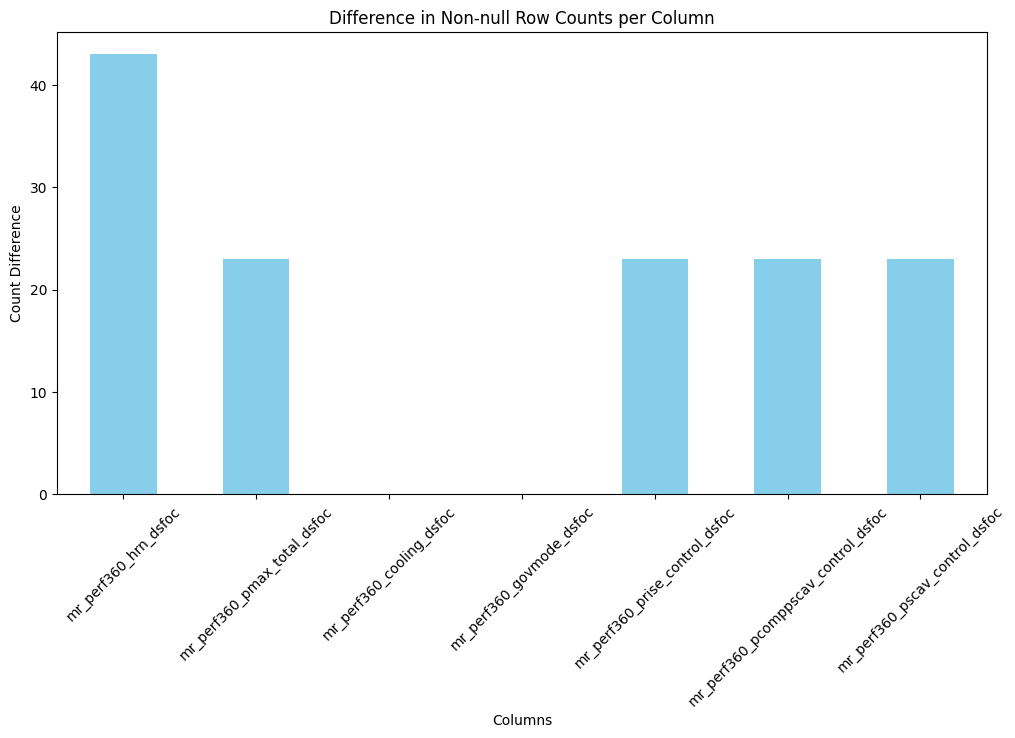

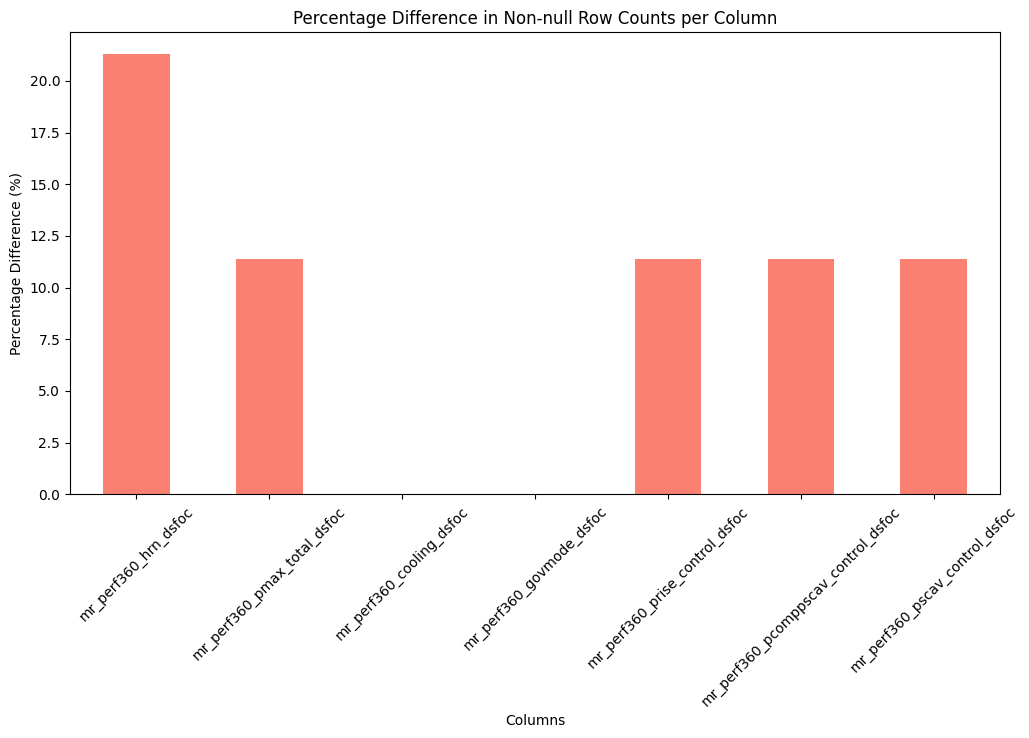

                                     Non-null Count DF1  Non-null Count DF2  \
mr_perf360_hrn_dsfoc                                202                 159   
mr_perf360_pmax_total_dsfoc                         202                 179   
mr_perf360_cooling_dsfoc                            202                 202   
mr_perf360_govmode_dsfoc                            367                 367   
mr_perf360_prise_control_dsfoc                      202                 179   
mr_perf360_pcomppscav_control_dsfoc                 202                 179   
mr_perf360_pscav_control_dsfoc                      202                 179   

                                     Count Difference  Percentage Difference  
mr_perf360_hrn_dsfoc                               43              21.287129  
mr_perf360_pmax_total_dsfoc                        23              11.386139  
mr_perf360_cooling_dsfoc                            0               0.000000  
mr_perf360_govmode_dsfoc                           

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def compare_non_null_counts(df1, df2):
    # Calculate non-null counts for each DataFrame
    non_null_counts_df1 = df1.notnull().sum()
    non_null_counts_df2 = df2.notnull().sum()
    
    # Calculate the difference in non-null counts
    count_diff = non_null_counts_df1 - non_null_counts_df2
    
    # Calculate the percentage difference
    percentage_diff = (count_diff / non_null_counts_df1) * 100
    
    # Create a DataFrame to hold the results
    comparison_df = pd.DataFrame({
        'Non-null Count DF1': non_null_counts_df1,
        'Non-null Count DF2': non_null_counts_df2,
        'Count Difference': count_diff,
        'Percentage Difference': percentage_diff
    })
    
    # Plot the count difference
    plt.figure(figsize=(12, 6))
    count_diff.plot(kind='bar', color='skyblue')
    plt.title('Difference in Non-null Row Counts per Column')
    plt.ylabel('Count Difference')
    plt.xlabel('Columns')
    plt.xticks(rotation=45)
    plt.show()
    
    # Plot the percentage difference
    plt.figure(figsize=(12, 6))
    percentage_diff.plot(kind='bar', color='salmon')
    plt.title('Percentage Difference in Non-null Row Counts per Column')
    plt.ylabel('Percentage Difference (%)')
    plt.xlabel('Columns')
    plt.xticks(rotation=45)
    plt.show()
    
    return comparison_df

comparison_df = compare_non_null_counts(sfoc_after_impute, sfoc_before_impute)
print(comparison_df)



/tmp/ipykernel_10395/3239994188.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diff_df.index, y=diff_df['Count Difference'], palette='viridis')
/tmp/ipykernel_10395/3239994188.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diff_df.index, y=diff_df['Percentage Difference'], palette='viridis')


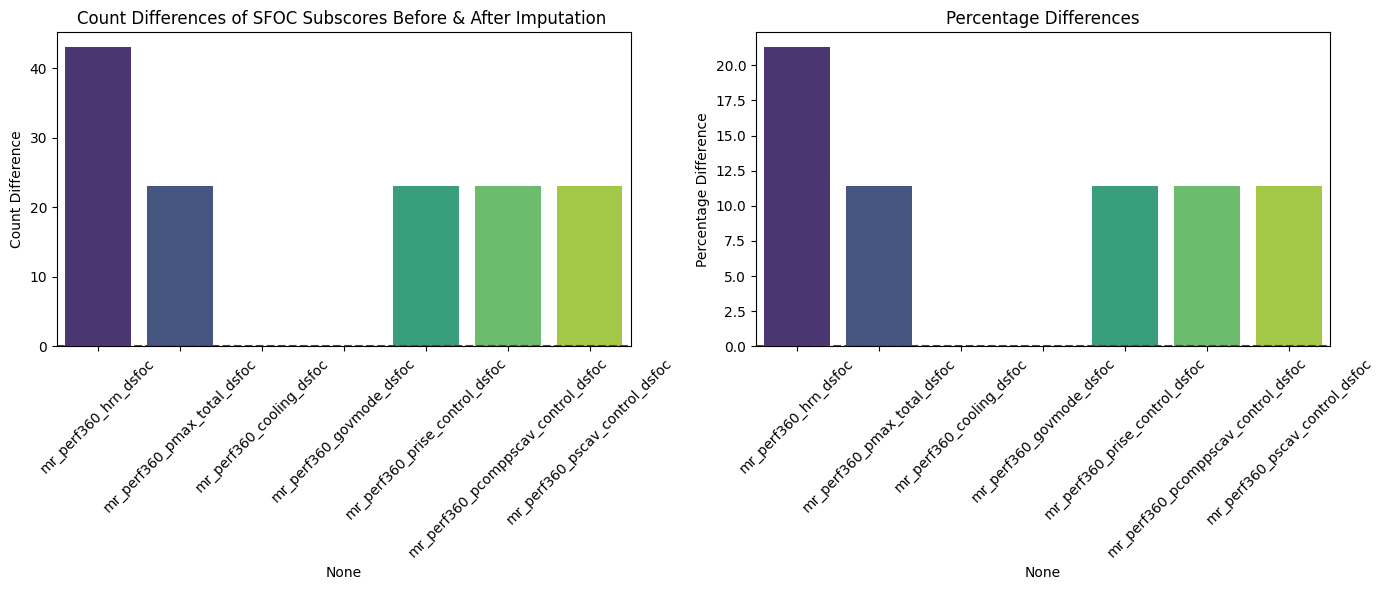

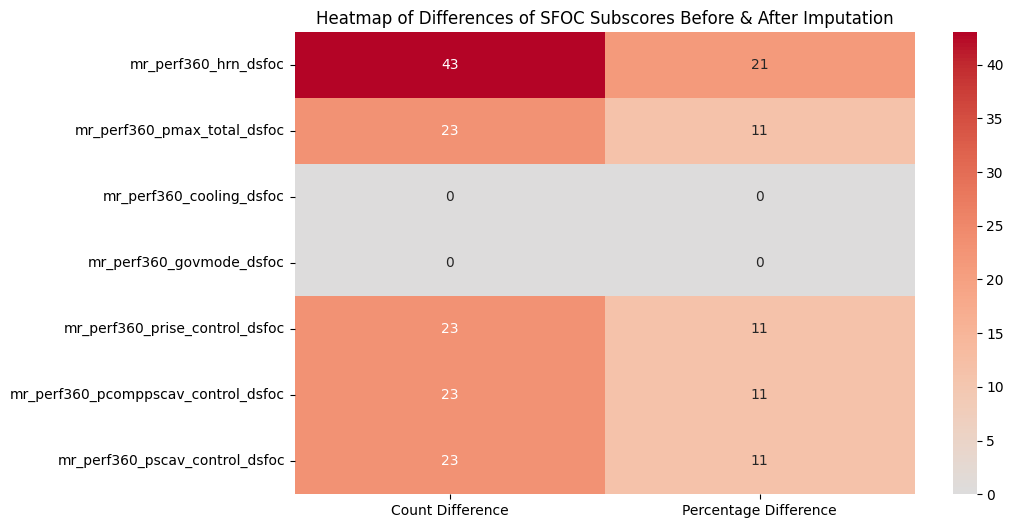

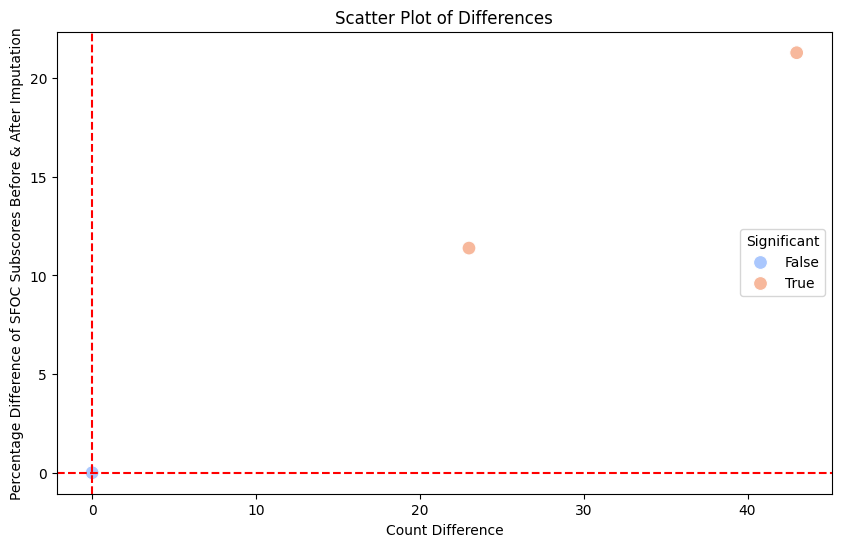

In [ ]:

import seaborn as sns

df1=sfoc_after_impute
df2=sfoc_before_impute

def highlight_significant_differences(df1, df2, threshold=10):
    # Calculate non-null counts for each DataFrame
    non_null_counts_df1 = df1.notnull().sum()
    non_null_counts_df2 = df2.notnull().sum()

    # Calculate differences in non-null counts
    count_diff = non_null_counts_df1 - non_null_counts_df2
    percentage_diff = (count_diff / non_null_counts_df1) * 100

    # Highlight significant differences
    significant_diff = percentage_diff.abs() > threshold

    # Create a DataFrame to hold the differences
    diff_df = pd.DataFrame({
        'Count Difference': count_diff,
        'Percentage Difference': percentage_diff,
        'Significant': significant_diff
    })

    return diff_df

def plot_differences(diff_df):
    # Plot count differences
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=diff_df.index, y=diff_df['Count Difference'], palette='viridis')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Count Differences of SFOC Subscores Before & After Imputation ')
    plt.xticks(rotation=45)

    # Plot percentage differences
    plt.subplot(1, 2, 2)
    sns.barplot(x=diff_df.index, y=diff_df['Percentage Difference'], palette='viridis')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Percentage Differences of SFOC Subscores Before & After Imputation')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

def plot_heatmap(diff_df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(diff_df[['Count Difference', 'Percentage Difference']], annot=True, cmap='coolwarm', center=0)
    plt.title('Heatmap of Differences of SFOC Subscores Before & After Imputation')
    plt.show()

def plot_scatter(diff_df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=diff_df['Count Difference'], y=diff_df['Percentage Difference'], hue=diff_df['Significant'], palette='coolwarm', s=100)
    plt.axhline(0, color='red', linestyle='--')
    plt.axvline(0, color='red', linestyle='--')
    plt.title('Scatter Plot of Differences')
    plt.xlabel('Count Difference')
    plt.ylabel('Percentage Difference of SFOC Subscores Before & After Imputation')
    plt.show()

# Calculate differences
diff_df = highlight_significant_differences(df1, df2, threshold=10)

# Plot differences
plot_differences(diff_df)
plot_heatmap(diff_df)
plot_scatter(diff_df)



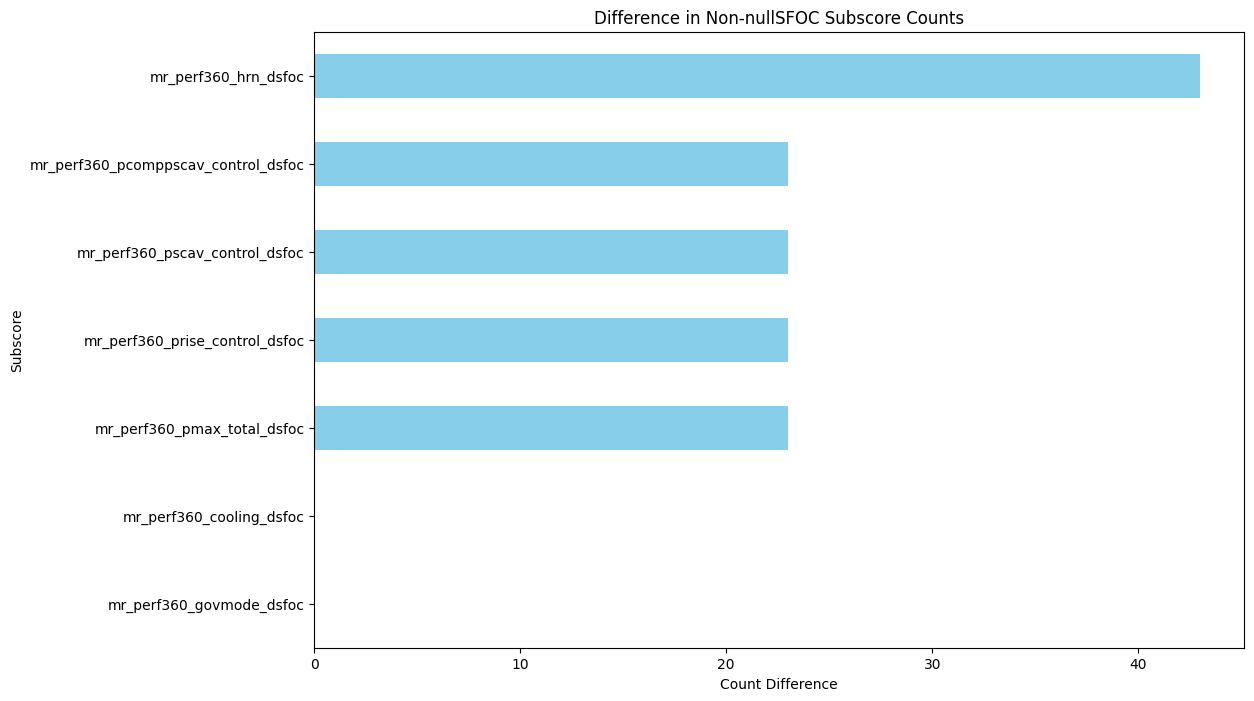

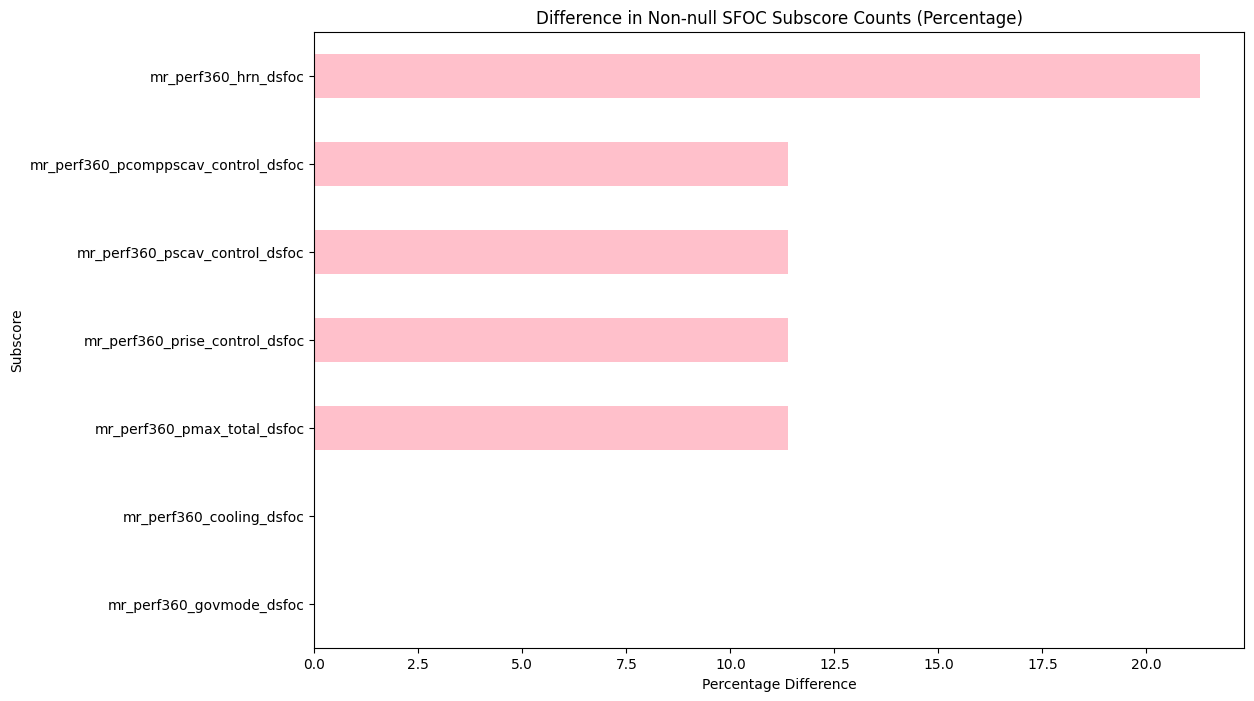

In [46]:


# Calculate non-null counts for each DataFrame
non_null_counts_df1 = sfoc_after_impute.notnull().sum()
non_null_counts_df2 = sfoc_before_impute.notnull().sum()

# Calculate the difference in non-null counts
count_diff = non_null_counts_df1 - non_null_counts_df2

# Calculate the percentage difference
percentage_diff = (count_diff / non_null_counts_df1) * 100


# Sort the differences in descending order
count_diff_sorted = count_diff.sort_values(ascending=True)
percentage_diff_sorted = percentage_diff.loc[count_diff_sorted.index]

# Plotting the count difference
plt.figure(figsize=(12, 8))
count_diff_sorted.plot(kind='barh', color='skyblue')
plt.title('Difference in Non-nullSFOC Subscore Counts')
plt.xlabel('Count Difference')
plt.ylabel('Subscore')
plt.show()
# Plotting the percentage difference

plt.figure(figsize=(12, 8))
percentage_diff_sorted.plot(kind='barh', color='pink')
plt.title('Difference in Non-null SFOC Subscore Counts (Percentage)')
plt.xlabel('Percentage Difference')
plt.ylabel('Subscore')
plt.show()



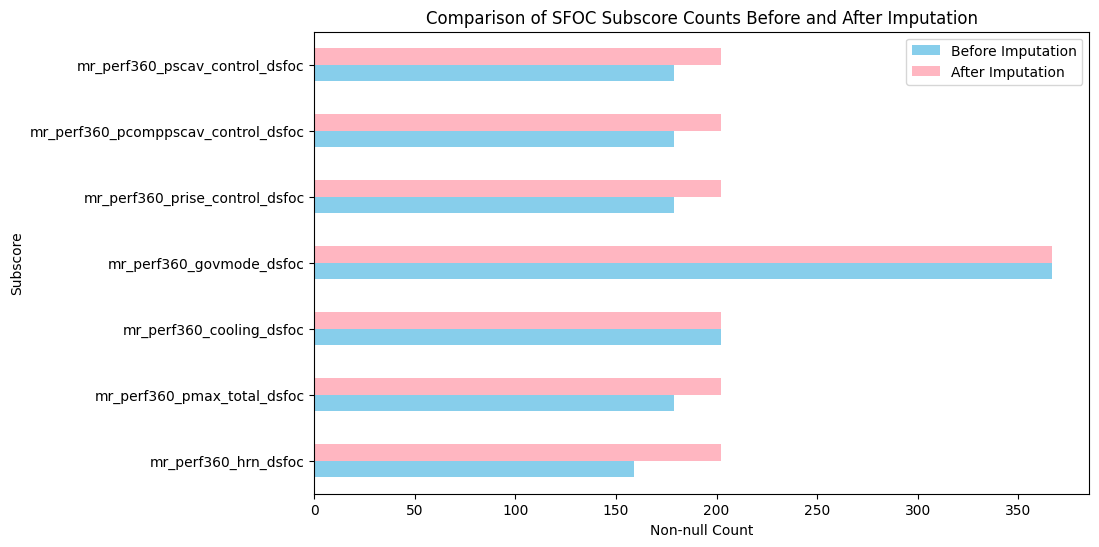

In [41]:
df1=sfoc_before_impute
df2=sfoc_after_impute


# Calculate non-null counts for each DataFrame
non_null_counts_df1 = df1.notnull().sum()
non_null_counts_df2 = df2.notnull().sum()

# Create a DataFrame to hold the non-null counts
non_null_counts = pd.DataFrame({
    'Before Imputation': non_null_counts_df1,
    'After Imputation': non_null_counts_df2
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Horizontal bar chart
non_null_counts.plot(kind='barh', ax=ax,color=['#87CEEB', '#FFB6C1'])


# Set labels and title
ax.set_xlabel('Non-null Count')
ax.set_ylabel('Subscore')
ax.set_title('Comparison of SFOC Subscore Counts Before and After Imputation')

# Display the plot
plt.show()



In [47]:
len(VAE_Imputed)

102264